In [7]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def distance(k, n, state):
    return [min(abs(k-i), n-abs(k-i)) for i in state]

In [24]:
def initstate(n):
    return [list(range(n)) for k in range(n)]

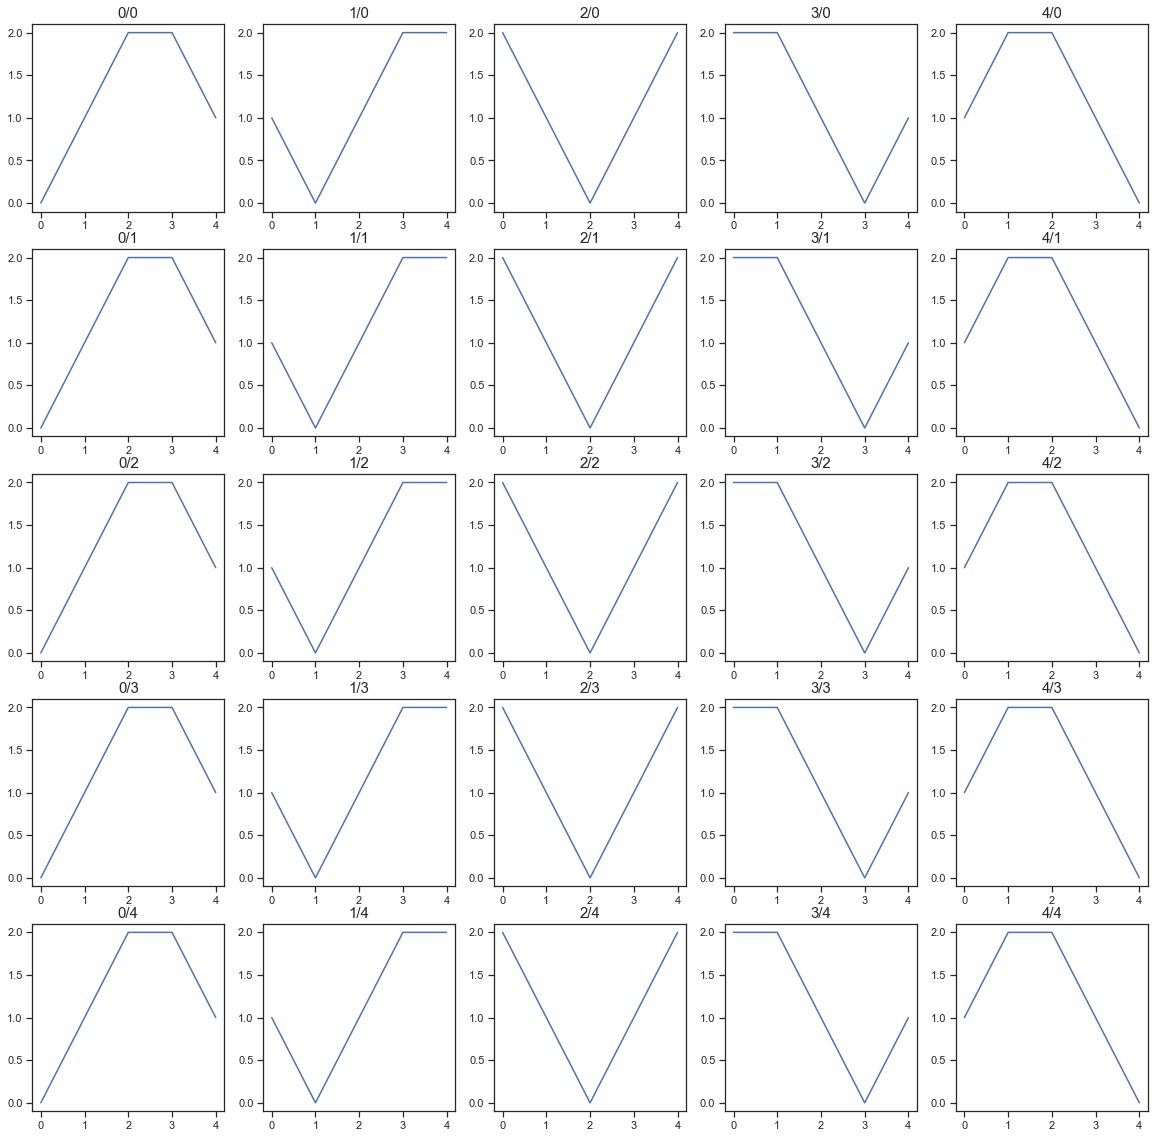

In [28]:
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))
n = 5
init_states = initstate(n)
for i in range(n):
    state = init_states[i]
    for k in range(n):
        d = pd.Series(distance(k, n, state))
        axarr[i][k].set_title(f"{k}/{i}", fontsize=15)
        d.plot.line(
            ax=axarr[i][k]
        )


In [8]:
def masterLocksmith(k, state):
    slopeChange = defaultdict(int)
    for i in state:
        slopeChange[i] += 2 # valley
        slopeChange[(i+k/2)%k] -= 2 # peak
    cost = sum(min(i, k - i) for i in state)
    
    slope = sum((2*x >= k) - (2*x < k) for x in state)
    lastX = 0
    best = (cost, 0)
    for x in sorted(slopeChange.keys()):
        cost += (x - lastX) * slope
        slope += slopeChange[x]
        lastX = x
        best = min(best, (cost, x))
    return best[1]

In [9]:
test1 = (10, [2, 7, 1])
test2 = (3, [2, 0, 1, 2, 0, 1, 2])
test3 = (4, [1,3])
test4 = (10, [7, 8, 9, 3, 3])
test5 = (100, [97, 98, 99, 0, 1])
test6 = (360, [178, 104, 21, 81, 330, 353, 299, 263, 221, 199, 124, 261, 66, 204, 244, 337, 224, 84, 352, 91])
test7 = (360, [45, 103, 44, 107, 41, 182, 14, 53, 181, 140, 186, 271, 189, 110, 78, 208, 354, 350, 70, 231])
test8 = (360, [46, 308, 85, 256, 216, 255, 289, 255, 100, 328, 138, 265, 49, 83, 320, 189, 56, 293, 326, 127])
test9 = (3, [0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1])
test10 = (4, [3, 3, 0, 0, 2, 1, 2, 3, 0, 0, 2, 1, 2, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 3, 2, 2, 3, 1, 3, 0, 1, 0, 3, 2, 3, 2, 0, 3, 2, 0, 1, 2, 3, 0, 3, 2, 2, 3, 2, 0, 3, 0, 1, 3, 1, 2, 0, 3, 2, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 3, 2, 0, 1, 3, 2, 1, 3, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 3, 2, 2, 3, 3, 2])
test11 = (5, [2, 0, 2, 0, 2, 0, 1, 3, 3, 3, 4, 2, 2, 4, 1, 3, 4, 4, 2, 0, 0, 0, 0, 3, 0, 2, 2, 1, 0, 0, 4, 3, 3, 1, 4, 4, 3, 4, 4, 2, 4, 0, 0, 2, 4, 0, 3, 1, 2, 0, 1, 2, 0, 3, 3, 2, 0, 1, 3, 1, 4, 3, 1, 1, 3, 4, 2, 2, 3, 3, 0, 2, 3, 3, 2, 1, 0, 3, 4, 3, 4, 3, 4, 0, 3, 3, 0, 1, 1, 0, 0, 2, 2, 1, 4, 2, 1, 0, 3, 3])

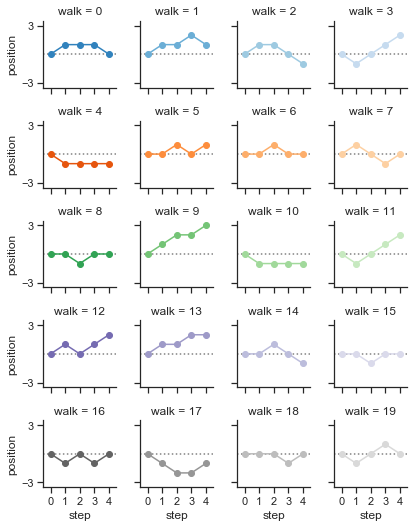

In [10]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)